# Compare SMOS/SMAP and PIOMAS SIT

### Module import

In [1]:
import netCDF4
import numpy as np
import xarray as xr
import pyproj
import cartopy.crs as ccrs
import pylab as plt
from pyresample import geometry,kd_tree#,imageenddates
import os

In [2]:
def regrid_swath_to_swath(data,lon_in,lat_in,lon_out,lat_out,radius_of_influence = 10000,eps = 0.5,fill_value = np.nan):
    """Regrid array using nearest neighbour. Change radius_of_influence depending on dataset. Input:
        - data: data to be gridded to the other grid (input dataset)
        - lon_in/lat_in: coordinates of input dataset
        - lon_out/lat_out: coordinates of target grid
        - radius_of_influence: If no pixel is found within this distance (in meters) on the input dataset, the pixel in the output dataset will be set to nan (or another fill_value to be specified in the function below)
        - eps: measure of uncertainty, larger eps mean shorter execution time
        - fill_value: Pixel will be set to this value if no pixel is found within radius_of_influence (in meters)"""

    swath_def_in = geometry.SwathDefinition(lons=lon_in, lats=lat_in)
    swath_def_out = geometry.SwathDefinition(lons=lon_out, lats=lat_out)
    data_out = kd_tree.resample_nearest(swath_def_in, data, swath_def_out, radius_of_influence=radius_of_influence, epsilon=eps, fill_value = fill_value)
    return data_out


### Load and prepare data

##### CS-SMOS SIT and geolocation

In [3]:
basedir = os.path.join(os.getenv("HOME"),"05_SINXS") # all SINXS stuff is here
datadir_cs2_smos = os.path.join(basedir,"02_DATA/02_OUTPUT/02_CS2-SMOS/02_NPY") # specific data to be loaded
datadir_piomas = os.path.join(basedir,"02_DATA/02_OUTPUT/01_PIOMAS/02_NPY") # specific data to be loaded
plotdir = os.path.join(basedir,"03_PLOTS/02_CS2-SMOS") # save plots here

In [4]:
sit_cs2_smos = np.load(os.path.join(datadir_cs2_smos,"sit_cs2-smos_202301.npz"))["arr_0"] # load CS2SMOS-SIT
lon_cs2_smos = np.load(os.path.join(datadir_cs2_smos,"lon_cs2-smos.npz"))["arr_0"] # load CS2-SMOS Lon
lat_cs2_smos = np.load(os.path.join(datadir_cs2_smos,"lat_cs2-smos.npz"))["arr_0"] # load CS2-SMOS Lat
sit_piomas = np.load(os.path.join(datadir_piomas,"sit_piomas_202301.npz"))["arr_0"] # load PIOMAS SIT
lon_piomas = np.load(os.path.join(datadir_piomas,"lon_piomas.npz"))["arr_0"] # load PIOMAS Lon
lon_piomas[lon_piomas > 180] -=360 # cartopy needs -180 to 180 as lon
lat_piomas = np.load(os.path.join(datadir_piomas,"lat_piomas.npz"))["arr_0"] # load PIOMAS Lat

##### Regrid PIOMAS

In [5]:
sit_piomas_ease = regrid_swath_to_swath(sit_piomas,lon_piomas,lat_piomas,lon_cs2_smos,lat_cs2_smos,radius_of_influence=50e3)

### Plotting

/var/folders/d6/cf68qnyn42708tqdllr3pbmjmsjrs2/T/ipykernel_37313/1776221076.py:9: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


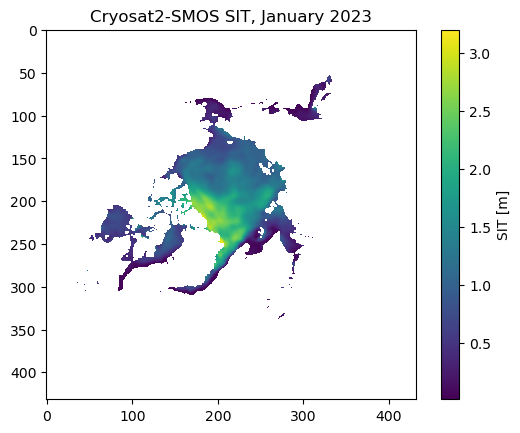

In [6]:
# Cryosat-SMOS SIT, native grid
fig = plt.figure() # open Figure
ax = fig.add_subplot(111) # add axis
ax.set_title("Cryosat2-SMOS SIT, January 2023") # set title
im = ax.imshow(sit_cs2_smos) # plot image
cb = plt.colorbar(im) # add colorbar
cb.set_label("SIT [m]") # add label to colorbar
fig.savefig(os.path.join(plotdir,"sit_cs2-smos_native_202301.pdf"),bbox_inches = "tight") # save plot
fig.show()

/var/folders/d6/cf68qnyn42708tqdllr3pbmjmsjrs2/T/ipykernel_37313/755655706.py:9: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


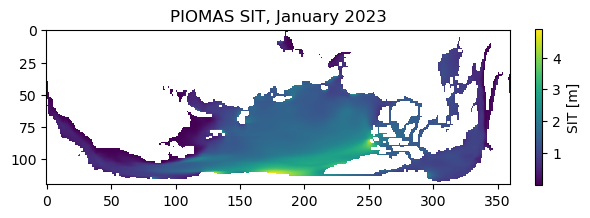

In [7]:
# PIOMAS SIT, native grid
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_title("PIOMAS SIT, January 2023")
im = ax.imshow(sit_piomas)
cb = plt.colorbar(im,fraction=0.047*(sit_piomas.shape[0]/sit_piomas.shape[1]))
cb.set_label("SIT [m]")
fig.savefig(os.path.join(plotdir,"sit_piomas_202301.png"),bbox_inches = "tight",dpi = 200)
fig.show()

/var/folders/d6/cf68qnyn42708tqdllr3pbmjmsjrs2/T/ipykernel_37313/1176844864.py:13: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


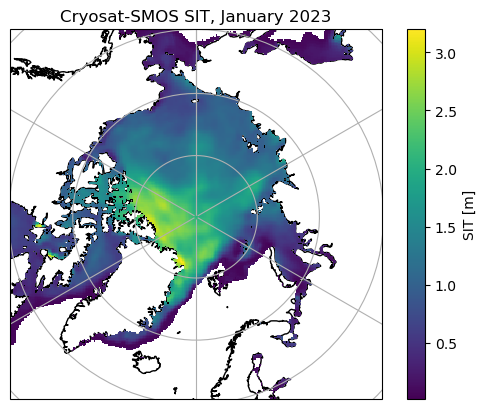

In [8]:
# CS-SMOS SIT
fig = plt.figure()
ax = plt.axes(projection=ccrs.NorthPolarStereo())
ax.set_extent([-180, 180, 60,90], ccrs.PlateCarree())

ax.coastlines();
ax.gridlines();
ax.set_title("Cryosat-SMOS SIT, January 2023")
im = ax.pcolormesh(lon_cs2_smos,lat_cs2_smos,sit_cs2_smos,zorder=2,transform = ccrs.PlateCarree())
cb = plt.colorbar(im)
cb.set_label("SIT [m]")
fig.savefig(os.path.join(plotdir, "sit_cs_smos_202301.png"),bbox_inches = "tight",dpi = 200)
fig.show()

/var/folders/d6/cf68qnyn42708tqdllr3pbmjmsjrs2/T/ipykernel_37313/3552894009.py:12: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


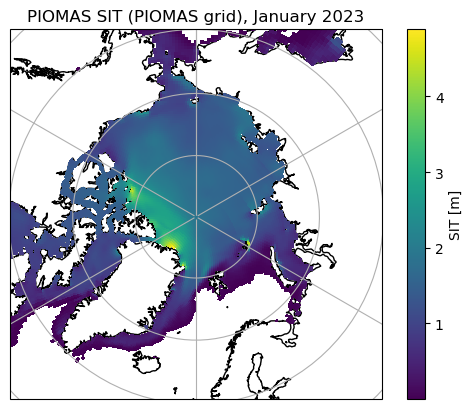

In [9]:
# PIOMAS original grid
fig = plt.figure()
ax = plt.axes(projection=ccrs.NorthPolarStereo())
ax.set_extent([-180, 180, 60,90], ccrs.PlateCarree())
ax.coastlines();
ax.gridlines();
ax.set_title("PIOMAS SIT (PIOMAS grid), January 2023")
im = ax.pcolormesh(lon_piomas,lat_piomas,sit_piomas,zorder=2,transform = ccrs.PlateCarree())
cb = plt.colorbar(im)
cb.set_label("SIT [m]")
fig.savefig(os.path.join(plotdir, "sit_piomas_202301.png"),bbox_inches = "tight",dpi = 200)
fig.show()

/var/folders/d6/cf68qnyn42708tqdllr3pbmjmsjrs2/T/ipykernel_37313/70369576.py:12: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


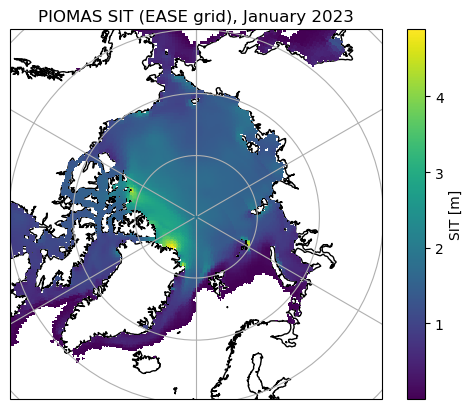

In [10]:
# PIOMAS EASE grid
fig = plt.figure()
ax = plt.axes(projection=ccrs.NorthPolarStereo())
ax.set_extent([-180, 180, 60,90], ccrs.PlateCarree())
ax.coastlines();
ax.gridlines();
ax.set_title("PIOMAS SIT (EASE grid), January 2023")
im = ax.pcolormesh(lon_cs2_smos,lat_cs2_smos,sit_piomas_ease,zorder=2,transform = ccrs.PlateCarree())
cb = plt.colorbar(im)
cb.set_label("SIT [m]")
fig.savefig(os.path.join(plotdir, "sit_piomas_easegrid_202301.png"),bbox_inches = "tight",dpi = 200)
fig.show()

In [11]:
diff_cs2smos_piomas = sit_cs2_smos - sit_piomas_ease
vmin_diff_tmp = np.nanpercentile([diff_cs2smos_piomas],q = 1) # use 1% percentile for minimum of colorbar
vmax_diff_tmp = np.nanpercentile([diff_cs2smos_piomas],q = 99) # use 99% percentile for maximum of colorbar
vmin_diff = -np.max([np.abs(vmin_diff_tmp),np.abs(vmax_diff_tmp)]) # take smallest difference as minimum
vmax_diff = np.max([np.abs(vmin_diff_tmp),np.abs(vmax_diff_tmp)]) # take largest difference as maximum

In [12]:
vmin_sit = 0 # minimum for SIT colorbar
vmax_sit = np.nanpercentile([sit_piomas_ease, sit_cs2_smos],q = 99) # larger of the two 99% percentiles as maximum


/var/folders/d6/cf68qnyn42708tqdllr3pbmjmsjrs2/T/ipykernel_37313/509928186.py:34: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


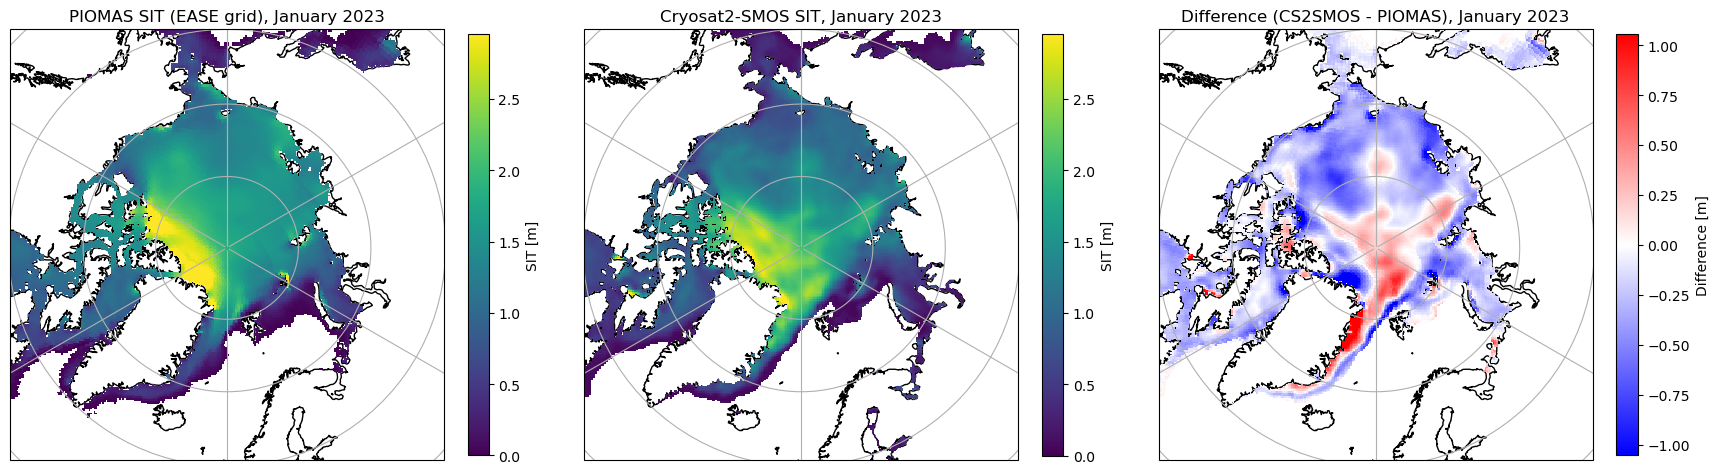

In [13]:
cmap = plt.colormaps["bwr"]
fig, axs = plt.subplots(nrows=1,ncols=3,subplot_kw={'projection': ccrs.NorthPolarStereo()},figsize=(21,8))

## PIOMAS SIT
ax1 = axs[0]
ax1.set_extent([-180, 180, 60,90], ccrs.PlateCarree())
ax1.coastlines();
ax1.gridlines();
ax1.set_title("PIOMAS SIT (EASE grid), January 2023")
im = ax1.pcolormesh(lon_cs2_smos,lat_cs2_smos,sit_piomas_ease,zorder=2,transform = ccrs.PlateCarree(), vmin = vmin_sit, vmax = vmax_sit) # use CS2-SMOS coordinates because PIOMS has been regridded to ease grid
cb = plt.colorbar(im,fraction=0.044*(lon_cs2_smos.shape[0]/lon_cs2_smos.shape[1]))
cb.set_label("SIT [m]")

## CS2-SMOS SIT
ax2 = axs[1]
ax2.set_extent([-180, 180, 60,90], ccrs.PlateCarree())
ax2.coastlines();
ax2.gridlines();
ax2.set_title("Cryosat2-SMOS SIT, January 2023")
im = ax2.pcolormesh(lon_cs2_smos,lat_cs2_smos,sit_cs2_smos,zorder=2,transform = ccrs.PlateCarree(), vmin = vmin_sit, vmax = vmax_sit)
cb = plt.colorbar(im,fraction=0.044*(lon_cs2_smos.shape[0]/lon_cs2_smos.shape[1]))
cb.set_label("SIT [m]")

## SIT DIFFERENCE
ax3 = axs[2]
ax3.set_extent([-180, 180, 60,90], ccrs.PlateCarree())
ax3.coastlines();
ax3.gridlines();
ax3.set_title("Difference (CS2SMOS - PIOMAS), January 2023")
im = ax3.pcolormesh(lon_cs2_smos,lat_cs2_smos,diff_cs2smos_piomas,zorder=2,transform = ccrs.PlateCarree(), vmin = vmin_diff, vmax = vmax_diff,cmap = cmap)
cb = plt.colorbar(im,fraction=0.044*(lon_cs2_smos.shape[0]/lon_cs2_smos.shape[1]))
cb.set_label("Difference [m]")
#fig.savefig(plotdir+"sit_cs_smos_piomas_20230101.png",bbox_inches = "tight",dpi = 200)
fig.show()

### Boxplots and Histograms

In [14]:
colors = plt.rcParams['axes.prop_cycle'].by_key()['color'][0:2]
colordict = {"PIOMAS":colors[0],"Cryosat2-SMOS":colors[1]}

In [15]:
dict4boxplot = {"PIOMAS (EASE)":sit_piomas_ease[~np.isnan(sit_piomas_ease)],"Cryosat2-SMOS":sit_cs2_smos[~np.isnan(sit_cs2_smos)],"PIOMAS":sit_piomas[~np.isnan(sit_piomas)]}

/var/folders/d6/cf68qnyn42708tqdllr3pbmjmsjrs2/T/ipykernel_37313/1663064502.py:33: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


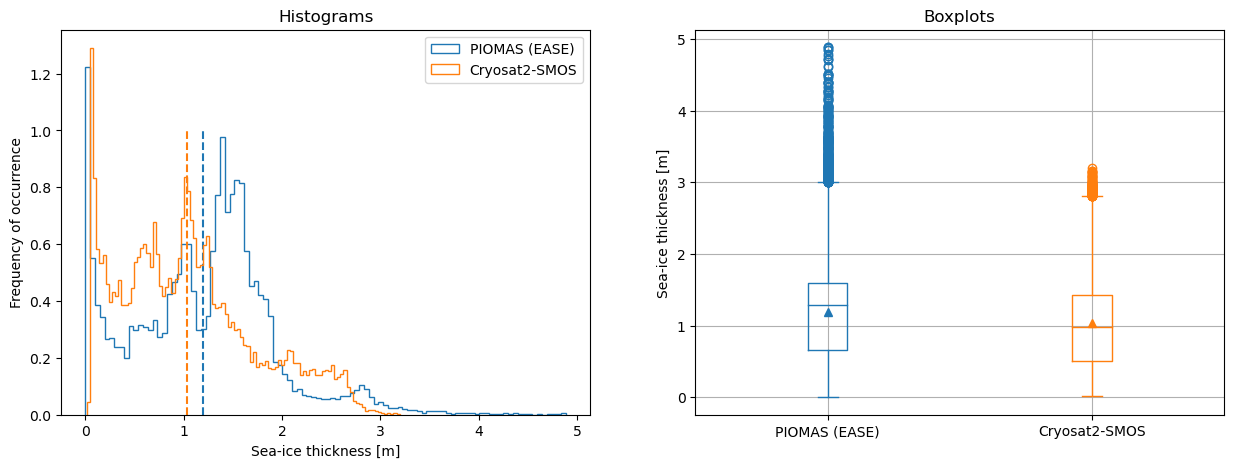

In [16]:
fig = plt.figure(figsize = (15,5))

## Plot histograms
ax1 = fig.add_subplot(121)
ax1.set_title("Histograms")
ax1.hist(sit_piomas_ease.flatten(),bins = 100,histtype = "step",density = True,label = "PIOMAS (EASE)",color = colordict["PIOMAS"])
ax1.vlines(np.nanmean(sit_piomas_ease),color = colors[0],linestyle = "dashed",ymin = 0, ymax = 1)
ax1.vlines(np.nanmean(sit_cs2_smos),color = colors[1],linestyle = "dashed",ymin = 0, ymax = 1)
ax1.hist(sit_cs2_smos.flatten(),bins = 100,histtype = "step",density = True, label = "Cryosat2-SMOS",color = colordict["Cryosat2-SMOS"])
ax1.set_ylabel("Frequency of occurrence")
ax1.set_xlabel("Sea-ice thickness [m]")
ax1.legend(loc = "upper right")

## Plot Boxplots
ax2 = fig.add_subplot(122)
ax2.set_title("Boxplots")
ax2.set_ylabel("Sea-ice thickness [m]")
ax2.grid()
bp = plt.boxplot([sit_piomas_ease[~np.isnan(sit_piomas_ease)],sit_cs2_smos[~np.isnan(sit_cs2_smos)]],showmeans=True,labels = ["PIOMAS (EASE)","Cryosat2-SMOS"])

for flier,mean,median,patch, color in zip(bp["fliers"],bp['means'],bp['medians'],bp['boxes'], colors): # change color of boxplots so that it matches the histograms
    patch.set_color(color)
    mean.set_markerfacecolor(color)
    mean.set_markeredgecolor(color)
    median.set_color(color)
    flier.set_markeredgecolor(color)
    
for cap,whisker, color in zip(bp["caps"],bp['whiskers'], [colors[0],colors[0],colors[1],colors[1]]): # change color of boxplots so that it matches the histograms
    whisker.set_color(color)
    cap.set_color(color)
    #flier.set_color(color)
fig.savefig(plotdir+"sit_histograms_boxplots_20230101.pdf",bbox_inches = "tight")
fig.show()

### Comparing PIOMAS on native and EASE grid

In [17]:
colors = [plt.rcParams['axes.prop_cycle'].by_key()['color'][0],plt.rcParams['axes.prop_cycle'].by_key()['color'][2]]
colordict = {"PIOMAS":colors[1],"PIOMAS (EASE)":colors[0]}

/var/folders/d6/cf68qnyn42708tqdllr3pbmjmsjrs2/T/ipykernel_37313/471552824.py:31: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


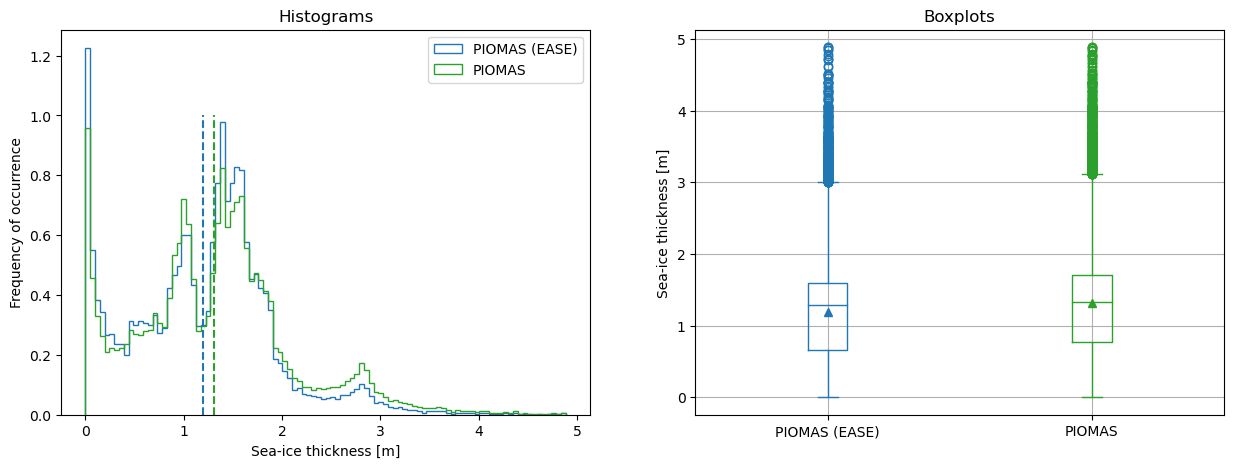

In [18]:
fig = plt.figure(figsize = (15,5))
ax1 = fig.add_subplot(121)
ax1.set_title("Histograms")
ax1.hist(sit_piomas_ease.flatten(),bins = 100,histtype = "step",density = True,label = "PIOMAS (EASE)",color = colordict["PIOMAS (EASE)"])
ax1.hist(sit_piomas.flatten(),bins = 100,histtype = "step",density = True,label = "PIOMAS",color = colordict["PIOMAS"])

ax1.vlines(np.nanmean(sit_piomas_ease),color = colors[0],linestyle = "dashed",ymin = 0, ymax = 1)

ax1.vlines(np.nanmean(sit_piomas),color = colors[1],linestyle = "dashed",ymin = 0, ymax = 1)
ax1.set_ylabel("Frequency of occurrence")
ax1.set_xlabel("Sea-ice thickness [m]")
ax1.legend(loc = "upper right")

ax2 = fig.add_subplot(122)
ax2.set_title("Boxplots")
ax2.set_ylabel("Sea-ice thickness [m]")
ax2.grid()
bp = plt.boxplot([sit_piomas_ease[~np.isnan(sit_piomas_ease)],sit_piomas[~np.isnan(sit_piomas)]],showmeans=True,labels = ["PIOMAS (EASE)","PIOMAS"])

for flier,mean,median,patch, color in zip(bp["fliers"],bp['means'],bp['medians'],bp['boxes'], colors):
    patch.set_color(color)
    mean.set_markerfacecolor(color)
    mean.set_markeredgecolor(color)
    median.set_color(color)
    flier.set_markeredgecolor(color)
    
for cap,whisker, color in zip(bp["caps"],bp['whiskers'], [colors[0],colors[0],colors[1],colors[1]]):
    whisker.set_color(color)
    cap.set_color(color)
#fig.savefig(plotdir+"sit_boxplots_20230101.pdf",bbox_inches = "tight")
fig.show()